# Carbon fixation scan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modelbase
from tqdm.notebook import tqdm
from modelbase.ode import Simulator

plt.style.use("./notebook.mplstyle")
print(modelbase.__version__)

1.3.6


In [2]:
%%capture
cd ..

In [3]:
from models import get_model

In [4]:
%%capture

cd analyses/

In [5]:
def get_new_y0(s):
    return dict(s.get_results_df().iloc[-1])


def pfd_ss_scan(s, pfd_values, y0_loop):
    fluxes = {}
    concentrations = {}
    for x in tqdm(pfd_values, total=len(pfd_values)):
        s.initialise(y0_loop)
        s.update_parameter("pfd", x)
        try:
            t, y = s.simulate_to_steady_state()
            concentrations[x] = y[-1]
            fluxes[x] = s.model.get_fluxes_array(y=y, t=t)[-1]
            # Model is sensitive to initial conditions, so set the last ones every loop
            y0_loop = get_new_y0(s)
        except:
            all_compounds = s.model.get_all_compounds()
            rate_names = s.model.get_rate_names()
            concentrations[x] = np.full(len(all_compounds), np.nan)
            fluxes[x] = np.full(len(rate_names), np.nan)
    return (
        pd.DataFrame(concentrations, index=s.model.compounds).T,
        pd.DataFrame(fluxes, index=s.model.get_rate_names()).T,
    )


NUM_SCANS = 50
LOW_LIGHT = 50
HIGH_LIGHT = 1500
PFD_VALUES = np.linspace(LOW_LIGHT, HIGH_LIGHT, NUM_SCANS)

y0 = {
    "PQ": 11.248282037382348,
    "PC": 1.3639930534269078,
    "Fd": 4.207984023619571,
    "ATP": 1.6085042256522668,
    "NADPH": 0.45672250689837696,
    "H": 0.002174958602661375,
    "LHC": 0.8079188314632375,
    "Psbs": 0.9626375680773129,
    "Vx": 0.9570474456930378,
    "PGA": 0.6109221284988471,
    "BPGA": 0.0003235574325883373,
    "GAP": 0.003190323205250446,
    "DHAP": 0.07018710225866034,
    "FBP": 0.0015898274733035427,
    "F6P": 0.0886998278393475,
    "G6P": 0.20400960399249862,
    "G1P": 0.011832557030606641,
    "SBP": 0.003215008299488195,
    "S7P": 0.02811069161049136,
    "E4P": 0.003523560381569699,
    "X5P": 0.006746131132013272,
    "R5P": 0.011299769265221232,
    "RUBP": 0.030373422172205858,
    "RU5P": 0.004519907641254276,
    "MDA": 2.2718326276618075e-06,
    "ASC": 9.999997726884683,
    "H2O2": 1.3296482521160688e-06,
    "DHA": 1.2828228406972059e-09,
    "GSH": 9.999999998752703,
    "GSSG": 6.236645512101874e-10,
    "TR_ox": 0.9,
    "E_inactive": 4.7368421052631575,
}

In [6]:
s = Simulator(get_model())
c_ss_petc, v_ss_petc = pfd_ss_scan(s, PFD_VALUES, y0)

  0%|          | 0/50 [00:00<?, ?it/s]

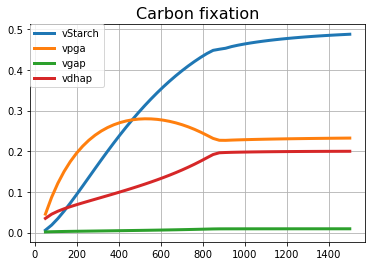

In [7]:
v_ss_petc.loc[:, ["vStarch", "vpga", "vgap", "vdhap"]].plot(title="Carbon fixation")
plt.show()